In [34]:
# Import library
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.types import *

In [35]:
# Create a SparkSession
spark = SparkSession.builder.appName("SupplyChain").getOrCreate()

# Load dataset
df = spark.read.load("/content/supply_chain_data.csv",format="csv", sep=",", inferSchema="true", header="true")
df.show(10)

+------------+----+------------------+------------+-----------------------+-----------------+---------------------+------------+----------+----------------+--------------+-----------------+------------------+-------------+---------+---------+------------------+-----------------------+-------------------+------------------+-------------------+--------------------+-------+------------------+
|Product type| SKU|             Price|Availability|Number of products sold|Revenue generated|Customer demographics|Stock levels|Lead times|Order quantities|Shipping times|Shipping carriers|    Shipping costs|Supplier name| Location|Lead time|Production volumes|Manufacturing lead time|Manufacturing costs|Inspection results|       Defect rates|Transportation modes| Routes|             Costs|
+------------+----+------------------+------------+-----------------------+-----------------+---------------------+------------+----------+----------------+--------------+-----------------+------------------+------

In [36]:
# Check dataframe schema
df.printSchema()

root
 |-- Product type: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Availability: integer (nullable = true)
 |-- Number of products sold: integer (nullable = true)
 |-- Revenue generated: double (nullable = true)
 |-- Customer demographics: string (nullable = true)
 |-- Stock levels: integer (nullable = true)
 |-- Lead times: integer (nullable = true)
 |-- Order quantities: integer (nullable = true)
 |-- Shipping times: integer (nullable = true)
 |-- Shipping carriers: string (nullable = true)
 |-- Shipping costs: double (nullable = true)
 |-- Supplier name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Lead time: integer (nullable = true)
 |-- Production volumes: integer (nullable = true)
 |-- Manufacturing lead time: integer (nullable = true)
 |-- Manufacturing costs: double (nullable = true)
 |-- Inspection results: string (nullable = true)
 |-- Defect rates: double (nullable = true)
 |-- Transportatio

In [37]:
# Check missing values
df_null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
df_null

{'Product type': 0,
 'SKU': 0,
 'Price': 0,
 'Availability': 0,
 'Number of products sold': 0,
 'Revenue generated': 0,
 'Customer demographics': 0,
 'Stock levels': 0,
 'Lead times': 0,
 'Order quantities': 0,
 'Shipping times': 0,
 'Shipping carriers': 0,
 'Shipping costs': 0,
 'Supplier name': 0,
 'Location': 0,
 'Lead time': 0,
 'Production volumes': 0,
 'Manufacturing lead time': 0,
 'Manufacturing costs': 0,
 'Inspection results': 0,
 'Defect rates': 0,
 'Transportation modes': 0,
 'Routes': 0,
 'Costs': 0}

In [38]:
# Create database table
df.createOrReplaceTempView("SupplyChain")

+------------+-------------+-----------+-----------+
|Product Type|Total Revenue|Total Costs|Total Order|
+------------+-------------+-----------+-----------+
|    skincare|    241628.16|   22229.32|       2099|
|   cosmetics|    161521.27|    13366.4|       1343|
|    haircare|    174455.39|   17328.86|       1480|
+------------+-------------+-----------+-----------+



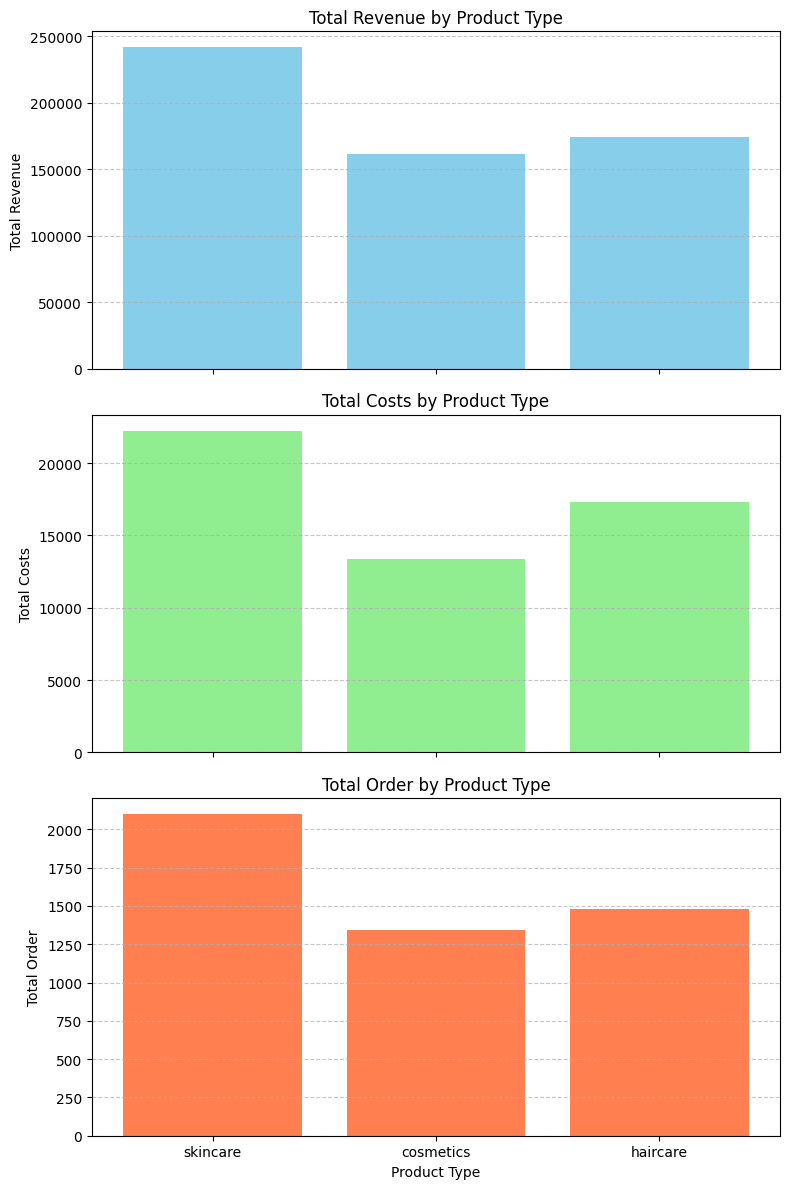

In [66]:
# Total Revenue, Cost, and Order by Product Type
product_type_revenue_order_cost = spark.sql("""
  SELECT
    `Product Type`,
    ROUND(SUM(`Revenue generated`), 2) AS `Total Revenue`,
    ROUND(SUM(Costs), 2) AS `Total Costs`,
    ROUND(SUM(`Order quantities`), 2) AS `Total Order`
  FROM SupplyChain
  GROUP BY `Product Type`
""")
# Display the result
product_type_revenue_order_cost.show()

# Convert to Pandas for visualization
product_type_df = product_type_revenue_order_cost.toPandas()

# Plot the bar chart
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
# Total Revenue
axes[0].bar(product_type_df['Product Type'], product_type_df['Total Revenue'], color='skyblue')
axes[0].set_title('Total Revenue by Product Type')
axes[0].set_ylabel('Total Revenue')
# Total Shipping Costs
axes[1].bar(product_type_df['Product Type'], product_type_df['Total Costs'], color='lightgreen')
axes[1].set_title('Total Costs by Product Type')
axes[1].set_ylabel('Total Costs')
# Total Order
axes[2].bar(product_type_df['Product Type'], product_type_df['Total Order'], color='coral')
axes[2].set_title('Total Order by Product Type')
axes[2].set_ylabel('Total Order')
axes[2].set_xlabel('Product Type')
# Adjust layout
for ax in axes:
    ax.tick_params(axis='x', labelrotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

+---------+------------+-------------+-----------+-----------+
| Location|Product Type|Total Revenue|Total Costs|Total Order|
+---------+------------+-------------+-----------+-----------+
|Bangalore|   cosmetics|     19309.56|    1885.17|        114|
|    Delhi|    skincare|     28972.12|    2959.58|        257|
|  Kolkata|   cosmetics|     24163.57|    1791.34|        149|
|   Mumbai|   cosmetics|     49156.51|    2574.72|        356|
|   Mumbai|    skincare|     44174.54|    3391.85|        368|
|  Kolkata|    haircare|     35027.71|    4371.64|        435|
|  Chennai|   cosmetics|     31461.95|    3274.71|        319|
|   Mumbai|    haircare|     44423.98|    3456.96|        359|
|    Delhi|    haircare|      14625.9|    1423.54|         71|
|  Chennai|    skincare|     58957.42|    5905.48|        472|
|  Chennai|    haircare|     28723.45|    3254.82|        318|
|    Delhi|   cosmetics|     37429.68|    3840.46|        405|
|Bangalore|    skincare|     31637.82|    3853.65|     

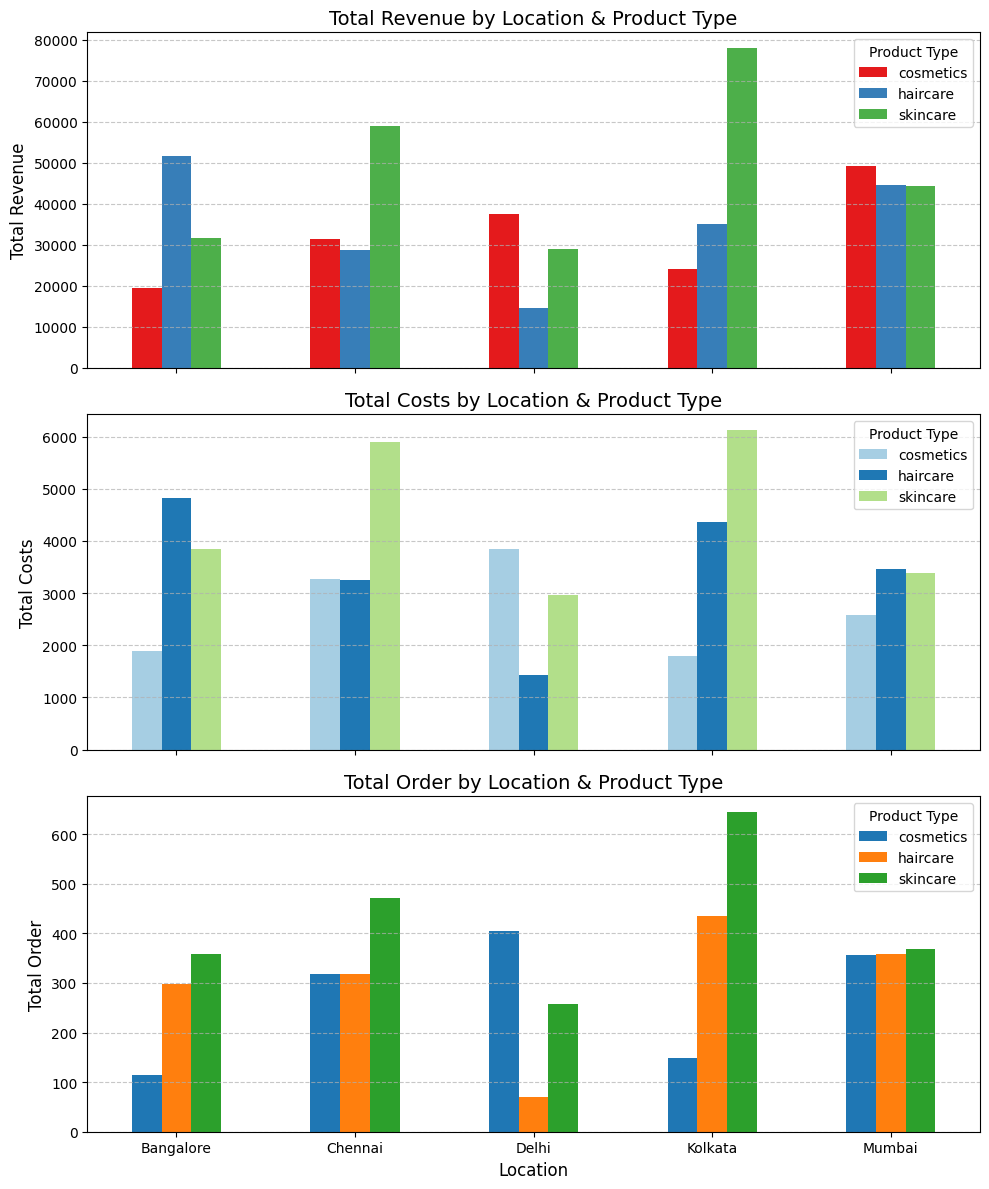

In [65]:
# Total Revenue, Cost, and Order by Location and Product Type
location_product_type_revenue_order_cost = spark.sql("""
  SELECT
    Location,
    `Product Type`,
    ROUND(SUM(`Revenue generated`), 2) AS `Total Revenue`,
    ROUND(SUM(Costs), 2) AS `Total Costs`,
    ROUND(SUM(`Order quantities`), 2) AS `Total Order`
  FROM SupplyChain
  GROUP BY Location, `Product Type`
""")
# Display the result
location_product_type_revenue_order_cost.show()

# Convert to Pandas for visualization
location_product_type_revenue_order_cost_df = location_product_type_revenue_order_cost.toPandas()

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Total Revenue with vibrant colormap
revenue_pivot = location_product_type_revenue_order_cost_df.pivot_table(
    index='Location', columns='Product Type', values='Total Revenue', aggfunc='sum'
)
revenue_pivot.plot(
    kind='bar', stacked=False, ax=axes[0],
    color=plt.cm.Set1(range(len(revenue_pivot.columns)))
)
axes[0].set_title('Total Revenue by Location & Product Type', fontsize=14)
axes[0].set_ylabel('Total Revenue', fontsize=12)

# Total Costs with a pastel colormap
costs_pivot = location_product_type_revenue_order_cost_df.pivot_table(
    index='Location', columns='Product Type', values='Total Costs', aggfunc='sum'
)
costs_pivot.plot(
    kind='bar', stacked=False, ax=axes[1],
    color=plt.cm.Paired(range(len(costs_pivot.columns)))
)
axes[1].set_title('Total Costs by Location & Product Type', fontsize=14)
axes[1].set_ylabel('Total Costs', fontsize=12)

# Total Order with a warm colormap
order_pivot = location_product_type_revenue_order_cost_df.pivot_table(
    index='Location', columns='Product Type', values='Total Order', aggfunc='sum'
)
order_pivot.plot(
    kind='bar', stacked=False, ax=axes[2],
    color=plt.cm.tab10(range(len(order_pivot.columns)))
)
axes[2].set_title('Total Order by Location & Product Type', fontsize=14)
axes[2].set_ylabel('Total Order', fontsize=12)
axes[2].set_xlabel('Location', fontsize=12)

# Adjust layout
for ax in axes:
    ax.tick_params(axis='x', labelrotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

+------+------------+-------------+-----------+-----------+
|Gender|Product Type|Total Revenue|Total Costs|Total Order|
+------+------------+-------------+-----------+-----------+
|  Male|   cosmetics|     21390.97|    2197.26|        246|
|Female|    skincare|     79241.11|    6655.16|        585|
|  Male|    haircare|     50599.93|    6645.41|        333|
|Female|   cosmetics|     69548.54|     5774.9|        533|
|  Male|    skincare|      54643.5|    3782.09|        320|
|Female|    haircare|     12724.83|     524.83|         23|
+------+------------+-------------+-----------+-----------+



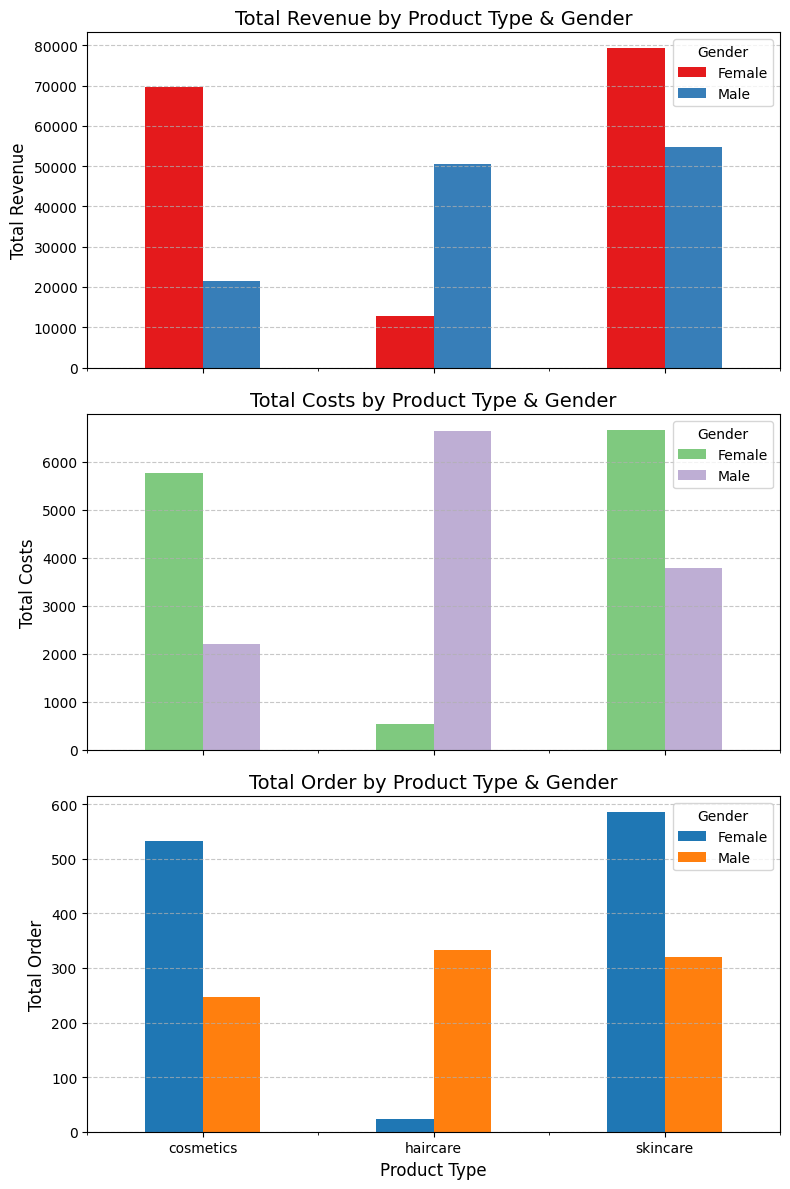

In [69]:
# Total Revenue, Cost, and Order by Product Type and Customer Demographics
gender_product_type_revenue_order_cost = spark.sql("""
  SELECT
    `Customer Demographics` AS Gender,
    `Product Type`,
    ROUND(SUM(`Revenue generated`), 2) AS `Total Revenue`,
    ROUND(SUM(Costs), 2) AS `Total Costs`,
    ROUND(SUM(`Order quantities`), 2) AS `Total Order`
  FROM SupplyChain
  WHERE `Customer Demographics` IN('Female','Male')
  GROUP BY `Customer Demographics`, `Product Type`
""")
# Display the result
gender_product_type_revenue_order_cost.show()

# Convert to Pandas for visualization
gender_product_type_revenue_order_cost_df = gender_product_type_revenue_order_cost.toPandas()

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Total Revenue with vibrant colormap
revenue_pivot = gender_product_type_revenue_order_cost_df.pivot_table(
    index='Product Type', columns='Gender', values='Total Revenue', aggfunc='sum'
)
revenue_pivot.plot(
    kind='bar', stacked=False, ax=axes[0],
    color=plt.cm.Set1(range(len(revenue_pivot.columns)))
)
axes[0].set_title('Total Revenue by Product Type & Gender', fontsize=14)
axes[0].set_ylabel('Total Revenue', fontsize=12)

# Total Costs with a pastel colormap
costs_pivot = gender_product_type_revenue_order_cost_df.pivot_table(
    index='Product Type', columns='Gender', values='Total Costs', aggfunc='sum'
)
costs_pivot.plot(
    kind='bar', stacked=False, ax=axes[1],
    color=plt.cm.Accent(range(len(costs_pivot.columns)))
)
axes[1].set_title('Total Costs by Product Type & Gender', fontsize=14)
axes[1].set_ylabel('Total Costs', fontsize=12)

# Total Order with a warm colormap
order_pivot = gender_product_type_revenue_order_cost_df.pivot_table(
    index='Product Type', columns='Gender', values='Total Order', aggfunc='sum'
)
order_pivot.plot(
    kind='bar', stacked=False, ax=axes[2],
    color=plt.cm.tab10(range(len(order_pivot.columns)))
)
axes[2].set_title('Total Order by Product Type & Gender', fontsize=14)
axes[2].set_ylabel('Total Order', fontsize=12)
axes[2].set_xlabel('Product Type', fontsize=12)

# Adjust layout
for ax in axes:
    ax.tick_params(axis='x', labelrotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

+-------+------------+-------------+-----------+-----------+
| Routes|Product Type|Total Revenue|Total Costs|Total Order|
+-------+------------+-------------+-----------+-----------+
|Route C|    haircare|     30930.97|    2085.94|        279|
|Route A|    skincare|     96012.38|    8137.95|        758|
|Route A|   cosmetics|      69575.6|    3515.24|        464|
|Route C|   cosmetics|     28653.63|    2870.62|        228|
|Route B|    skincare|     85278.42|    9038.51|        836|
|Route A|    haircare|     87610.87|    9222.59|        622|
|Route C|    skincare|     60337.36|    5052.86|        505|
|Route B|   cosmetics|     63292.04|    6980.54|        651|
|Route B|    haircare|     55913.55|    6020.33|        579|
+-------+------------+-------------+-----------+-----------+



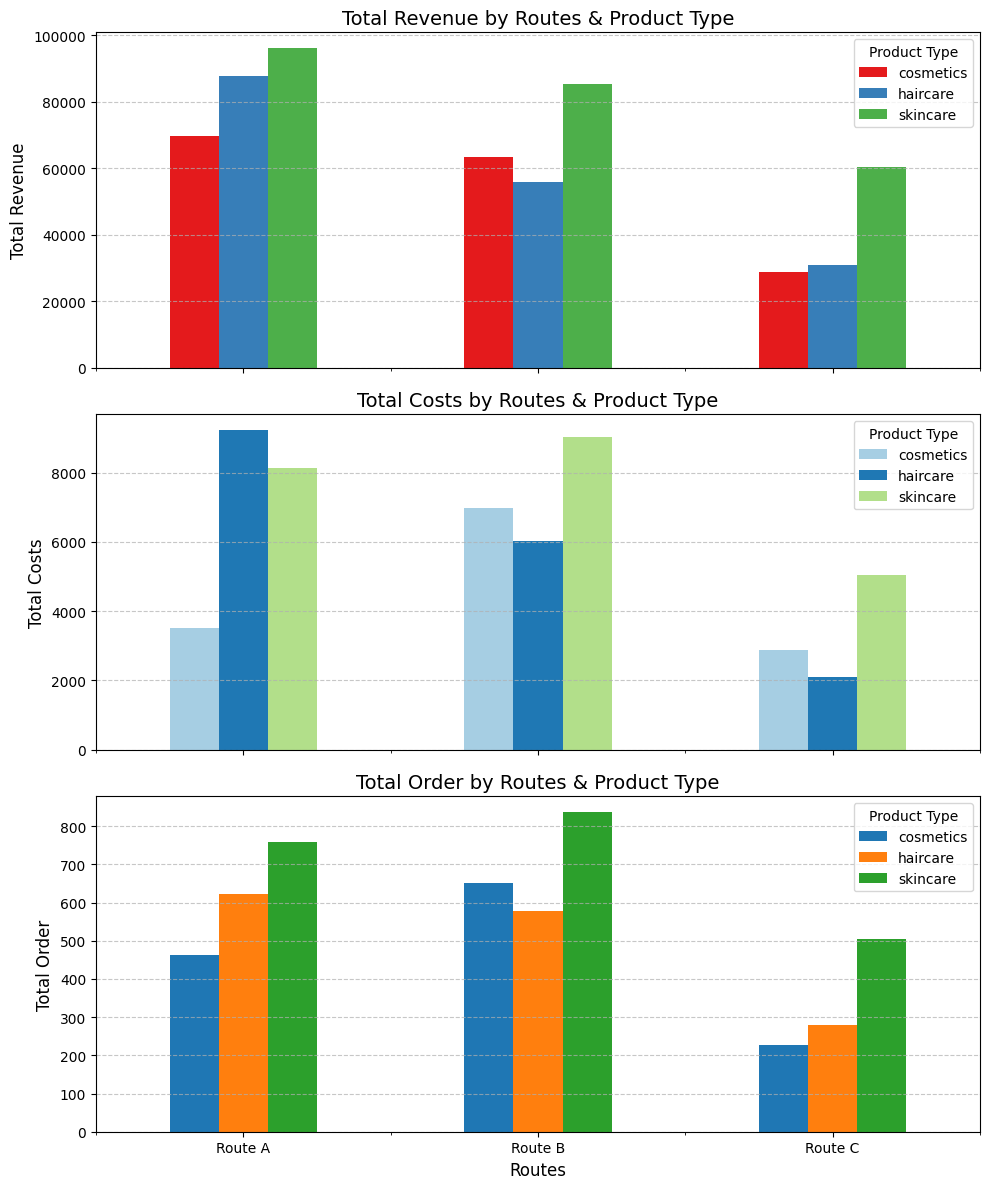

In [70]:
# Total Revenue, Cost, and Order by Routes and Product Type
routes_product_type_revenue_order_cost = spark.sql("""
  SELECT
    Routes,
    `Product Type`,
    ROUND(SUM(`Revenue generated`), 2) AS `Total Revenue`,
    ROUND(SUM(Costs), 2) AS `Total Costs`,
    ROUND(SUM(`Order quantities`), 2) AS `Total Order`
  FROM SupplyChain
  GROUP BY Routes, `Product Type`
""")
# Display the result
routes_product_type_revenue_order_cost.show()

# Convert to Pandas for visualization
routes_product_type_revenue_order_cost_df = routes_product_type_revenue_order_cost.toPandas()

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Total Revenue with vibrant colormap
revenue_pivot = routes_product_type_revenue_order_cost_df.pivot_table(
    index='Routes', columns='Product Type', values='Total Revenue', aggfunc='sum'
)
revenue_pivot.plot(
    kind='bar', stacked=False, ax=axes[0],
    color=plt.cm.Set1(range(len(revenue_pivot.columns)))
)
axes[0].set_title('Total Revenue by Routes & Product Type', fontsize=14)
axes[0].set_ylabel('Total Revenue', fontsize=12)

# Total Costs with a pastel colormap
costs_pivot = routes_product_type_revenue_order_cost_df.pivot_table(
    index='Routes', columns='Product Type', values='Total Costs', aggfunc='sum'
)
costs_pivot.plot(
    kind='bar', stacked=False, ax=axes[1],
    color=plt.cm.Paired(range(len(costs_pivot.columns)))
)
axes[1].set_title('Total Costs by Routes & Product Type', fontsize=14)
axes[1].set_ylabel('Total Costs', fontsize=12)

# Total Order with a warm colormap
order_pivot = routes_product_type_revenue_order_cost_df.pivot_table(
    index='Routes', columns='Product Type', values='Total Order', aggfunc='sum'
)
order_pivot.plot(
    kind='bar', stacked=False, ax=axes[2],
    color=plt.cm.tab10(range(len(order_pivot.columns)))
)
axes[2].set_title('Total Order by Routes & Product Type', fontsize=14)
axes[2].set_ylabel('Total Order', fontsize=12)
axes[2].set_xlabel('Routes', fontsize=12)

# Adjust layout
for ax in axes:
    ax.tick_params(axis='x', labelrotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

+--------------------+------------+-------------+-----------+-----------+
|Transportation Modes|Product Type|Total Revenue|Total Costs|Total Order|
+--------------------+------------+-------------+-----------+-----------+
|                 Sea|   cosmetics|     35239.64|    2617.45|        382|
|                Road|    skincare|     55928.18|     5864.9|        575|
|                 Air|    skincare|     76043.02|    8434.14|        708|
|                Road|   cosmetics|     49289.27|    3870.06|        268|
|                Road|    haircare|     54097.78|    6313.23|        543|
|                 Sea|    skincare|     43607.53|    2366.03|        308|
|                 Sea|    haircare|     18716.65|    2119.44|        163|
|                Rail|    skincare|     66049.43|    5564.25|        508|
|                Rail|   cosmetics|     50404.65|     4908.9|        463|
|                Rail|    haircare|     48536.33|    4695.78|        371|
|                 Air|   cosmetics|   

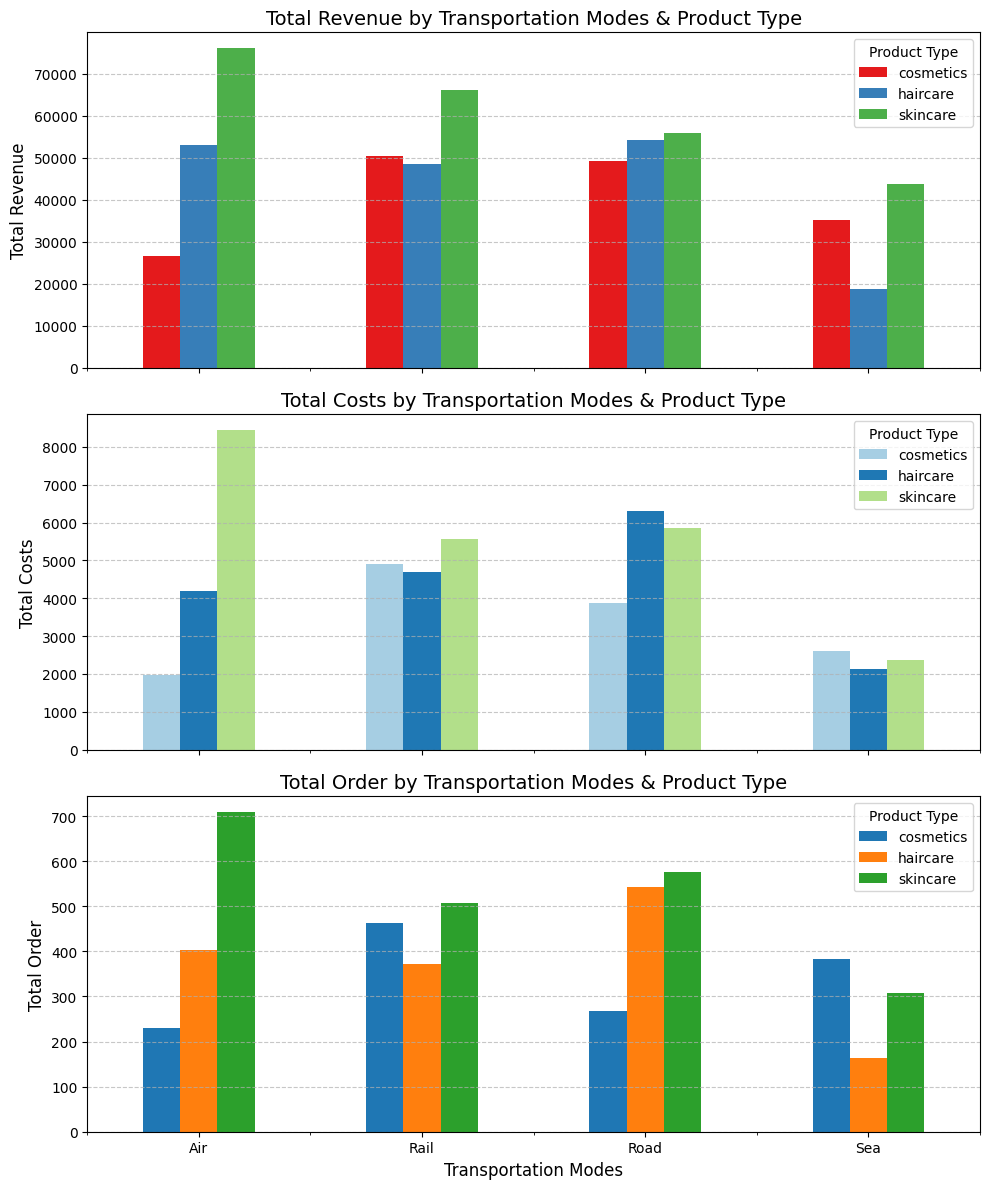

In [71]:
# Total Revenue, Cost, and Order by Transportation Modes and Product Type
transportation_product_type_revenue_order_cost = spark.sql("""
  SELECT
    `Transportation Modes`,
    `Product Type`,
    ROUND(SUM(`Revenue generated`), 2) AS `Total Revenue`,
    ROUND(SUM(Costs), 2) AS `Total Costs`,
    ROUND(SUM(`Order quantities`), 2) AS `Total Order`
  FROM SupplyChain
  GROUP BY `Transportation Modes`, `Product Type`
""")
# Display the result
transportation_product_type_revenue_order_cost.show()

# Convert to Pandas for visualization
transportation_product_type_revenue_order_cost_df = transportation_product_type_revenue_order_cost.toPandas()

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Total Revenue with vibrant colormap
revenue_pivot = transportation_product_type_revenue_order_cost_df.pivot_table(
    index='Transportation Modes', columns='Product Type', values='Total Revenue', aggfunc='sum'
)
revenue_pivot.plot(
    kind='bar', stacked=False, ax=axes[0],
    color=plt.cm.Set1(range(len(revenue_pivot.columns)))
)
axes[0].set_title('Total Revenue by Transportation Modes & Product Type', fontsize=14)
axes[0].set_ylabel('Total Revenue', fontsize=12)

# Total Costs with a pastel colormap
costs_pivot = transportation_product_type_revenue_order_cost_df.pivot_table(
    index='Transportation Modes', columns='Product Type', values='Total Costs', aggfunc='sum'
)
costs_pivot.plot(
    kind='bar', stacked=False, ax=axes[1],
    color=plt.cm.Paired(range(len(costs_pivot.columns)))
)
axes[1].set_title('Total Costs by Transportation Modes & Product Type', fontsize=14)
axes[1].set_ylabel('Total Costs', fontsize=12)

# Total Order with a warm colormap
order_pivot = transportation_product_type_revenue_order_cost_df.pivot_table(
    index='Transportation Modes', columns='Product Type', values='Total Order', aggfunc='sum'
)
order_pivot.plot(
    kind='bar', stacked=False, ax=axes[2],
    color=plt.cm.tab10(range(len(order_pivot.columns)))
)
axes[2].set_title('Total Order by Transportation Modes & Product Type', fontsize=14)
axes[2].set_ylabel('Total Order', fontsize=12)
axes[2].set_xlabel('Transportation Modes', fontsize=12)

# Adjust layout
for ax in axes:
    ax.tick_params(axis='x', labelrotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()